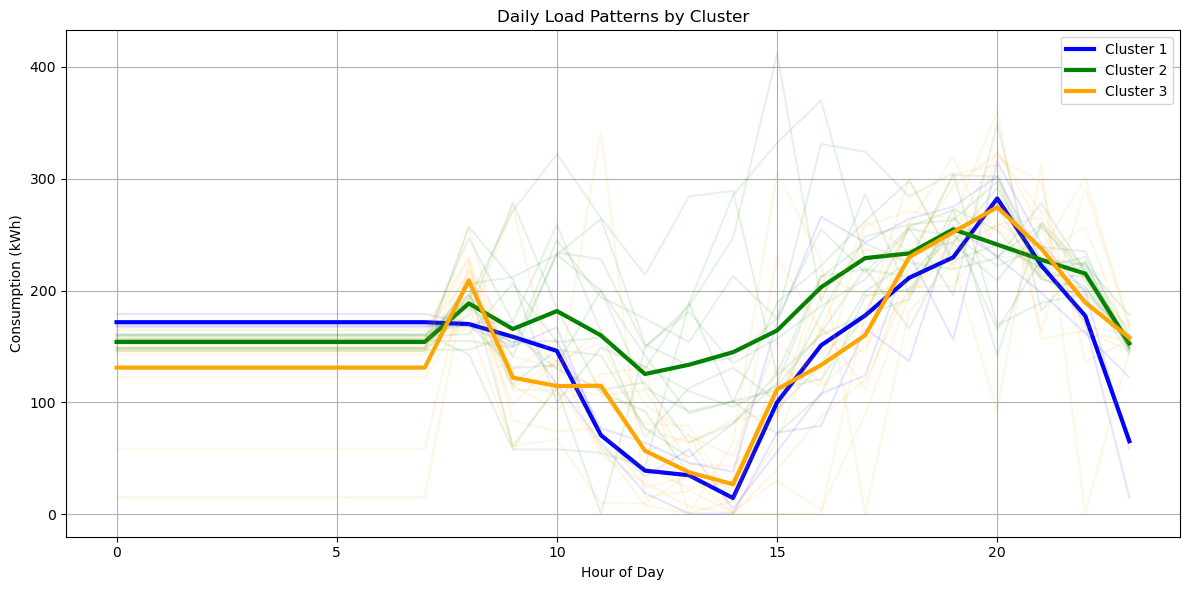

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Fix MKL memory leak warning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("E:/final.csv")


df['Datetime'] = pd.to_datetime(df['Datetime'], format="%m/%d/%Y %H:%M", errors='coerce')
df = df.dropna(subset=['Datetime', 'Consumption'])  # remove bad rows
df = df.sort_values('Datetime').reset_index(drop=True)


df['Date'] = df['Datetime'].dt.date
df['Hour'] = df['Datetime'].dt.hour
pivot = df.pivot_table(index='Date', columns='Hour', values='Consumption', aggfunc='mean')
pivot = pivot.dropna()  # remove incomplete days

# Normalizing  and cluster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

pivot['Cluster'] = labels


colors = ['blue', 'green', 'orange']
plt.figure(figsize=(12, 6))
for c in range(3):
    for row in pivot[pivot['Cluster'] == c].iloc[:, :24].values:
        plt.plot(row, color=colors[c], alpha=0.1)
    plt.plot(pivot[pivot['Cluster'] == c].iloc[:, :24].mean().values,
             label=f'Cluster {c+1}', color=colors[c], linewidth=3)

plt.title("Daily Load Patterns by Cluster")
plt.xlabel("Hour of Day")
plt.ylabel("Consumption (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
